### Compositional analysis of DMD Lymphoid snRNA-Seq dataset using `ScCoda`
- **Developed by**: Srivalli Kolla
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 19_06_2024
- **Last modified**: 19_06_2024

# Import statements and environments

In [1]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt

2024-06-25 16:47:36.957246: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-25 16:47:36.991455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 16:47:37.696034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Set up working environment

In [2]:
sc.settings.verbosity = 3
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

# Data preparation

## Data loading

In [3]:
adata = sc.read_h5ad("../../data/heart_mm_nuclei-23-0092_scANVI-Lymphoid_states_ctl240527.raw.h5ad")
adata

AnnData object with n_obs × n_vars = 65544 × 16060
    obs: 'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_type', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
    var: 'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD

### Data cleanup

In [4]:
adata.obs = adata.obs.rename(columns={'cell_type': 'cell_types'})
adata.obs

,orig.ident,Age_group,BMI,COVID_severity,COVID_status,Ethnicity,Group,Sex,annotation_broad,annotation_detailed,...,pct_counts_ribo,percent_mt2,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,MPC_Annotation,compartment
AAACGCTGTTATAGAG-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,34.0,NaN,DMD
AAAGAACTCCCGTGTT-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.0,NaN,DMD
AACAAAGAGCGTTGTT-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,0.0,NaN,DMD
AACAAAGTCAAGCCTA-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,0.0,NaN,DMD
AACAAGAAGTTGAATG-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.0,23.0,NaN,DMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAACAGTCACACT-1_2-MDX_MPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B_TLF_Mac,MDX_MPC
TTGAGTGCACTCCGAG-1_2-MDX_MPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B_TLF_Mac,MDX_MPC
TTGGGCGTCCCGTGAG-1_2-MDX_MPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B_TLF_Mac,MDX_MPC
TTTACTGAGATCACTC-1_2-MDX_MPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B_TLF_Mac,MDX_MPC


# ScCODA - All

In [5]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(adata, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_data

MuData object with n_obs × n_vars = 65565 × 16078
  2 modalities
    rna:	65544 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	21 x 18
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

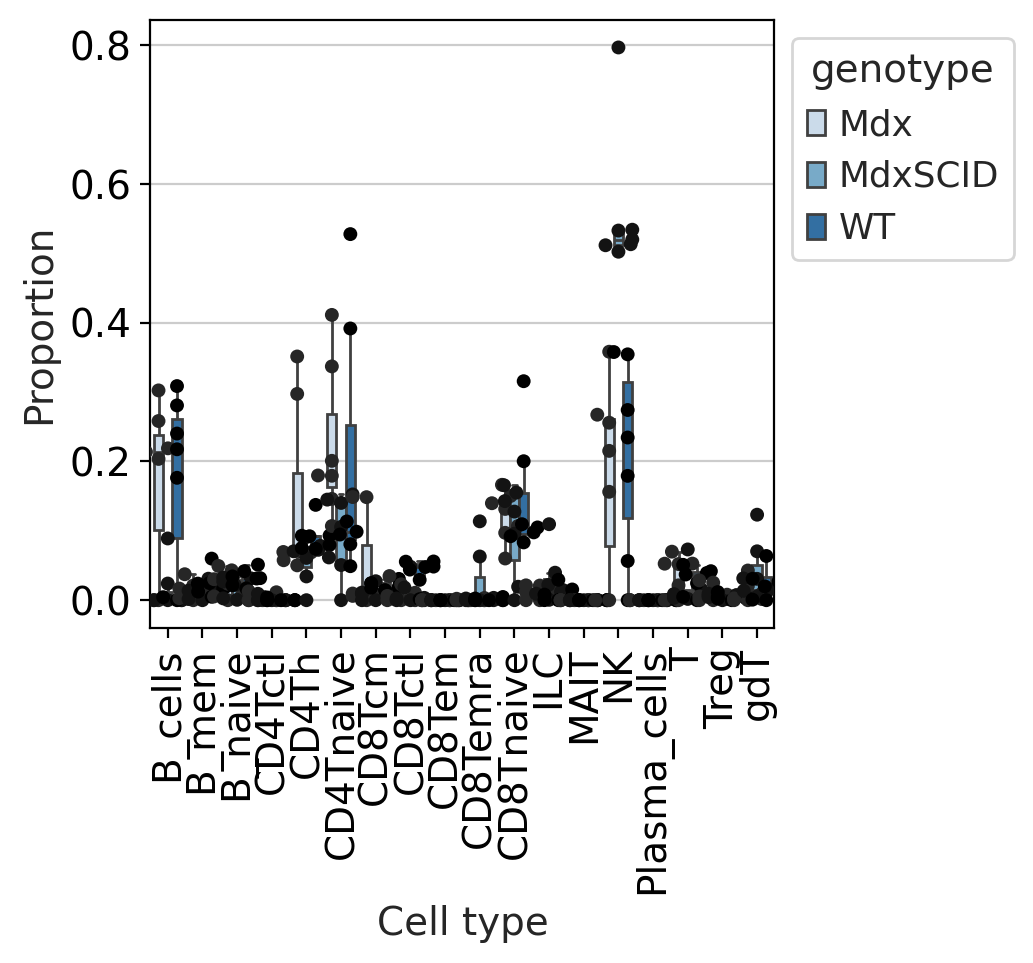

In [6]:
pt.pl.coda.boxplots(sccoda_data, add_dots= True, feature_name= 'genotype')
plt.show()

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

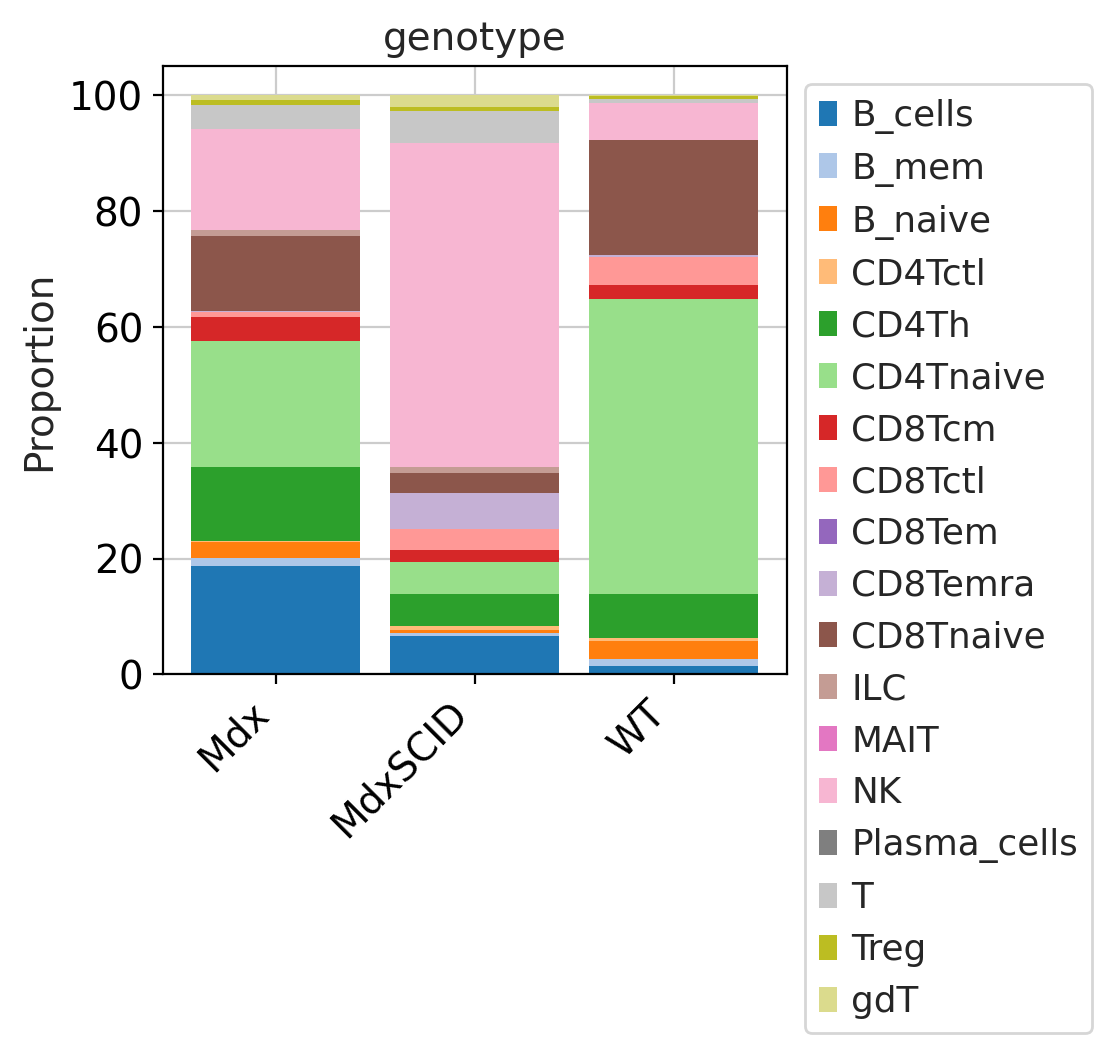

In [7]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

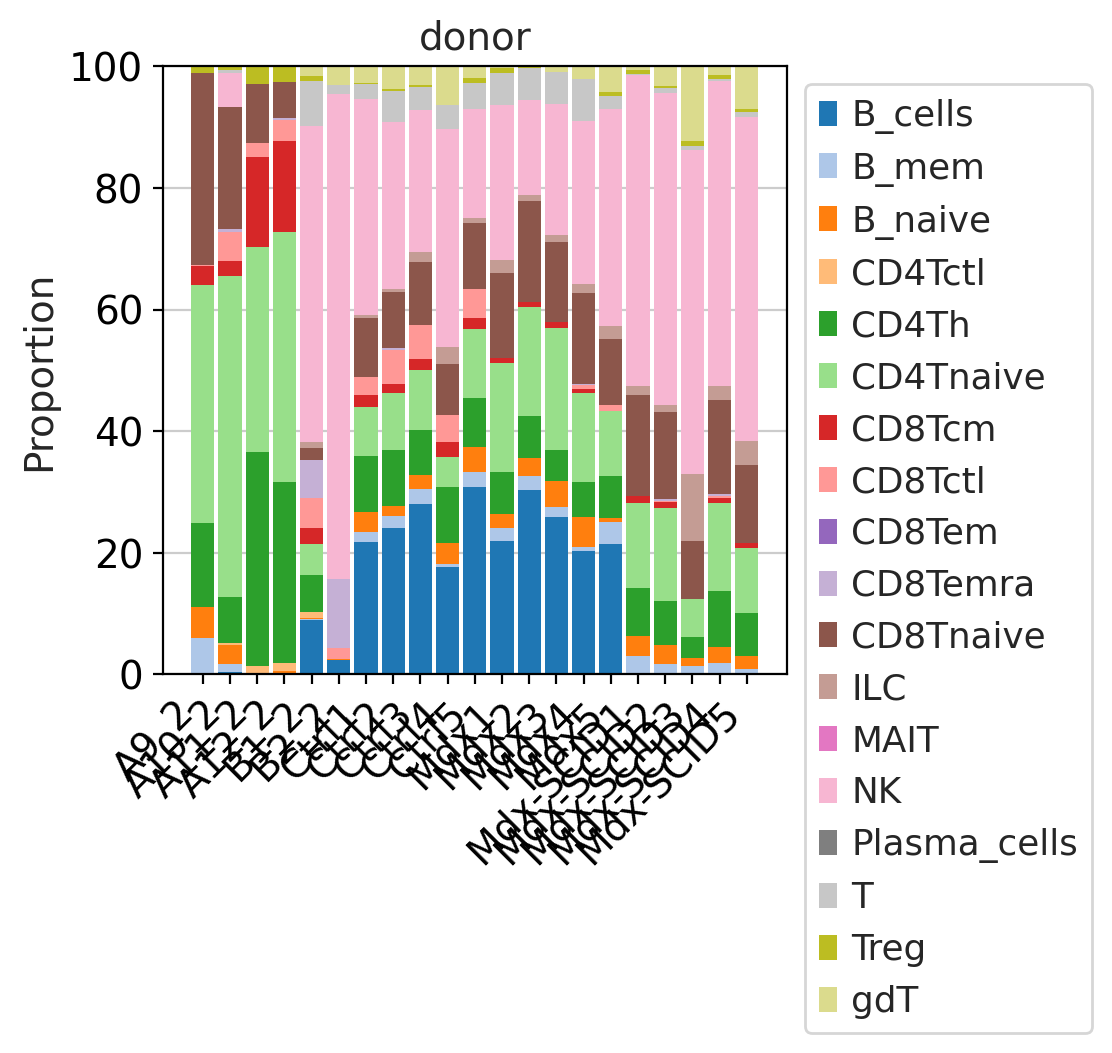

In [8]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='donor')

In [9]:
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key= 'coda', formula= 'genotype')
sccoda_model.run_nuts(sccoda_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to B_naive

Zero counts encountered in data! Added a pseudocount of 0.5.

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
sample: 100%|██████████| 11000/11000 [01:37<00:00, 112.94it/s, 255 steps of size 2.24e-02. acc. prob=0.79]


In [10]:
sccoda_model.set_fdr(sccoda_data, 0.05)

In [11]:
sccoda_data

MuData object with n_obs × n_vars = 65565 × 16078
  2 modalities
    rna:	65544 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	21 x 18
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.MdxSCID]', 'effect_df_genotype[T.WT]'

In [12]:
sccoda_data['coda'].varm['effect_df_genotype[T.MdxSCID]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_cells,-1.110302,-1.940,-0.304,0.472,0.9615,53.265673,-2.400547
B_mem,0.000000,-0.819,0.585,0.223,0.3519,62.965923,-0.798720
B_naive,0.000000,0.000,0.000,0.000,0.0000,78.303608,-0.798720
CD4Tctl,0.000000,-0.769,0.743,0.245,0.3766,30.956831,-0.798720
CD4Th,0.000000,-1.016,0.226,0.291,0.4487,199.855315,-0.798720
CD4Tnaive,0.000000,-1.159,0.050,0.382,0.6805,329.835380,-0.798720
CD8Tcm,0.000000,-1.060,0.444,0.273,0.3922,69.449070,-0.798720
CD8Tctl,0.000000,-0.889,0.550,0.242,0.3633,57.892838,-0.798720
CD8Tem,0.000000,-0.713,0.805,0.239,0.3702,26.406064,-0.798720


In [13]:
sccoda_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_cells,0.0,-0.318,0.366,0.124,0.5038,281.244480,0.0
B_mem,0.0,-0.268,0.430,0.131,0.5168,109.532831,0.0
B_naive,0.0,0.000,0.000,0.000,0.0000,136.213612,0.0
CD4Tctl,0.0,-0.379,0.310,0.124,0.5013,53.851181,0.0
CD4Th,0.0,-0.271,0.351,0.110,0.4969,347.659769,0.0
CD4Tnaive,0.0,-0.392,0.246,0.117,0.4970,573.767538,0.0
CD8Tcm,0.0,-0.263,0.418,0.126,0.5130,120.810636,0.0
CD8Tctl,0.0,-0.208,0.622,0.183,0.5525,100.707908,0.0
CD8Tem,0.0,-0.374,0.295,0.121,0.5042,45.934861,0.0


In [14]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate            Cell Type   
genotype[T.MdxSCID]  B_cells          True
                     B_mem           False
                     B_naive         False
                     CD4Tctl         False
                     CD4Th           False
                     CD4Tnaive       False
                     CD8Tcm          False
                     CD8Tctl         False
                     CD8Tem          False
                     CD8Temra        False
                     CD8Tnaive       False
                     ILC             False
                     MAIT            False
                     NK               True
                     Plasma_cells    False
                     T               False
                     Treg            False
                     gdT             False
genotype[T.WT]       B_cells         False
                     B_mem           False
                     B_naive         False
                     CD4Tctl         False
                    

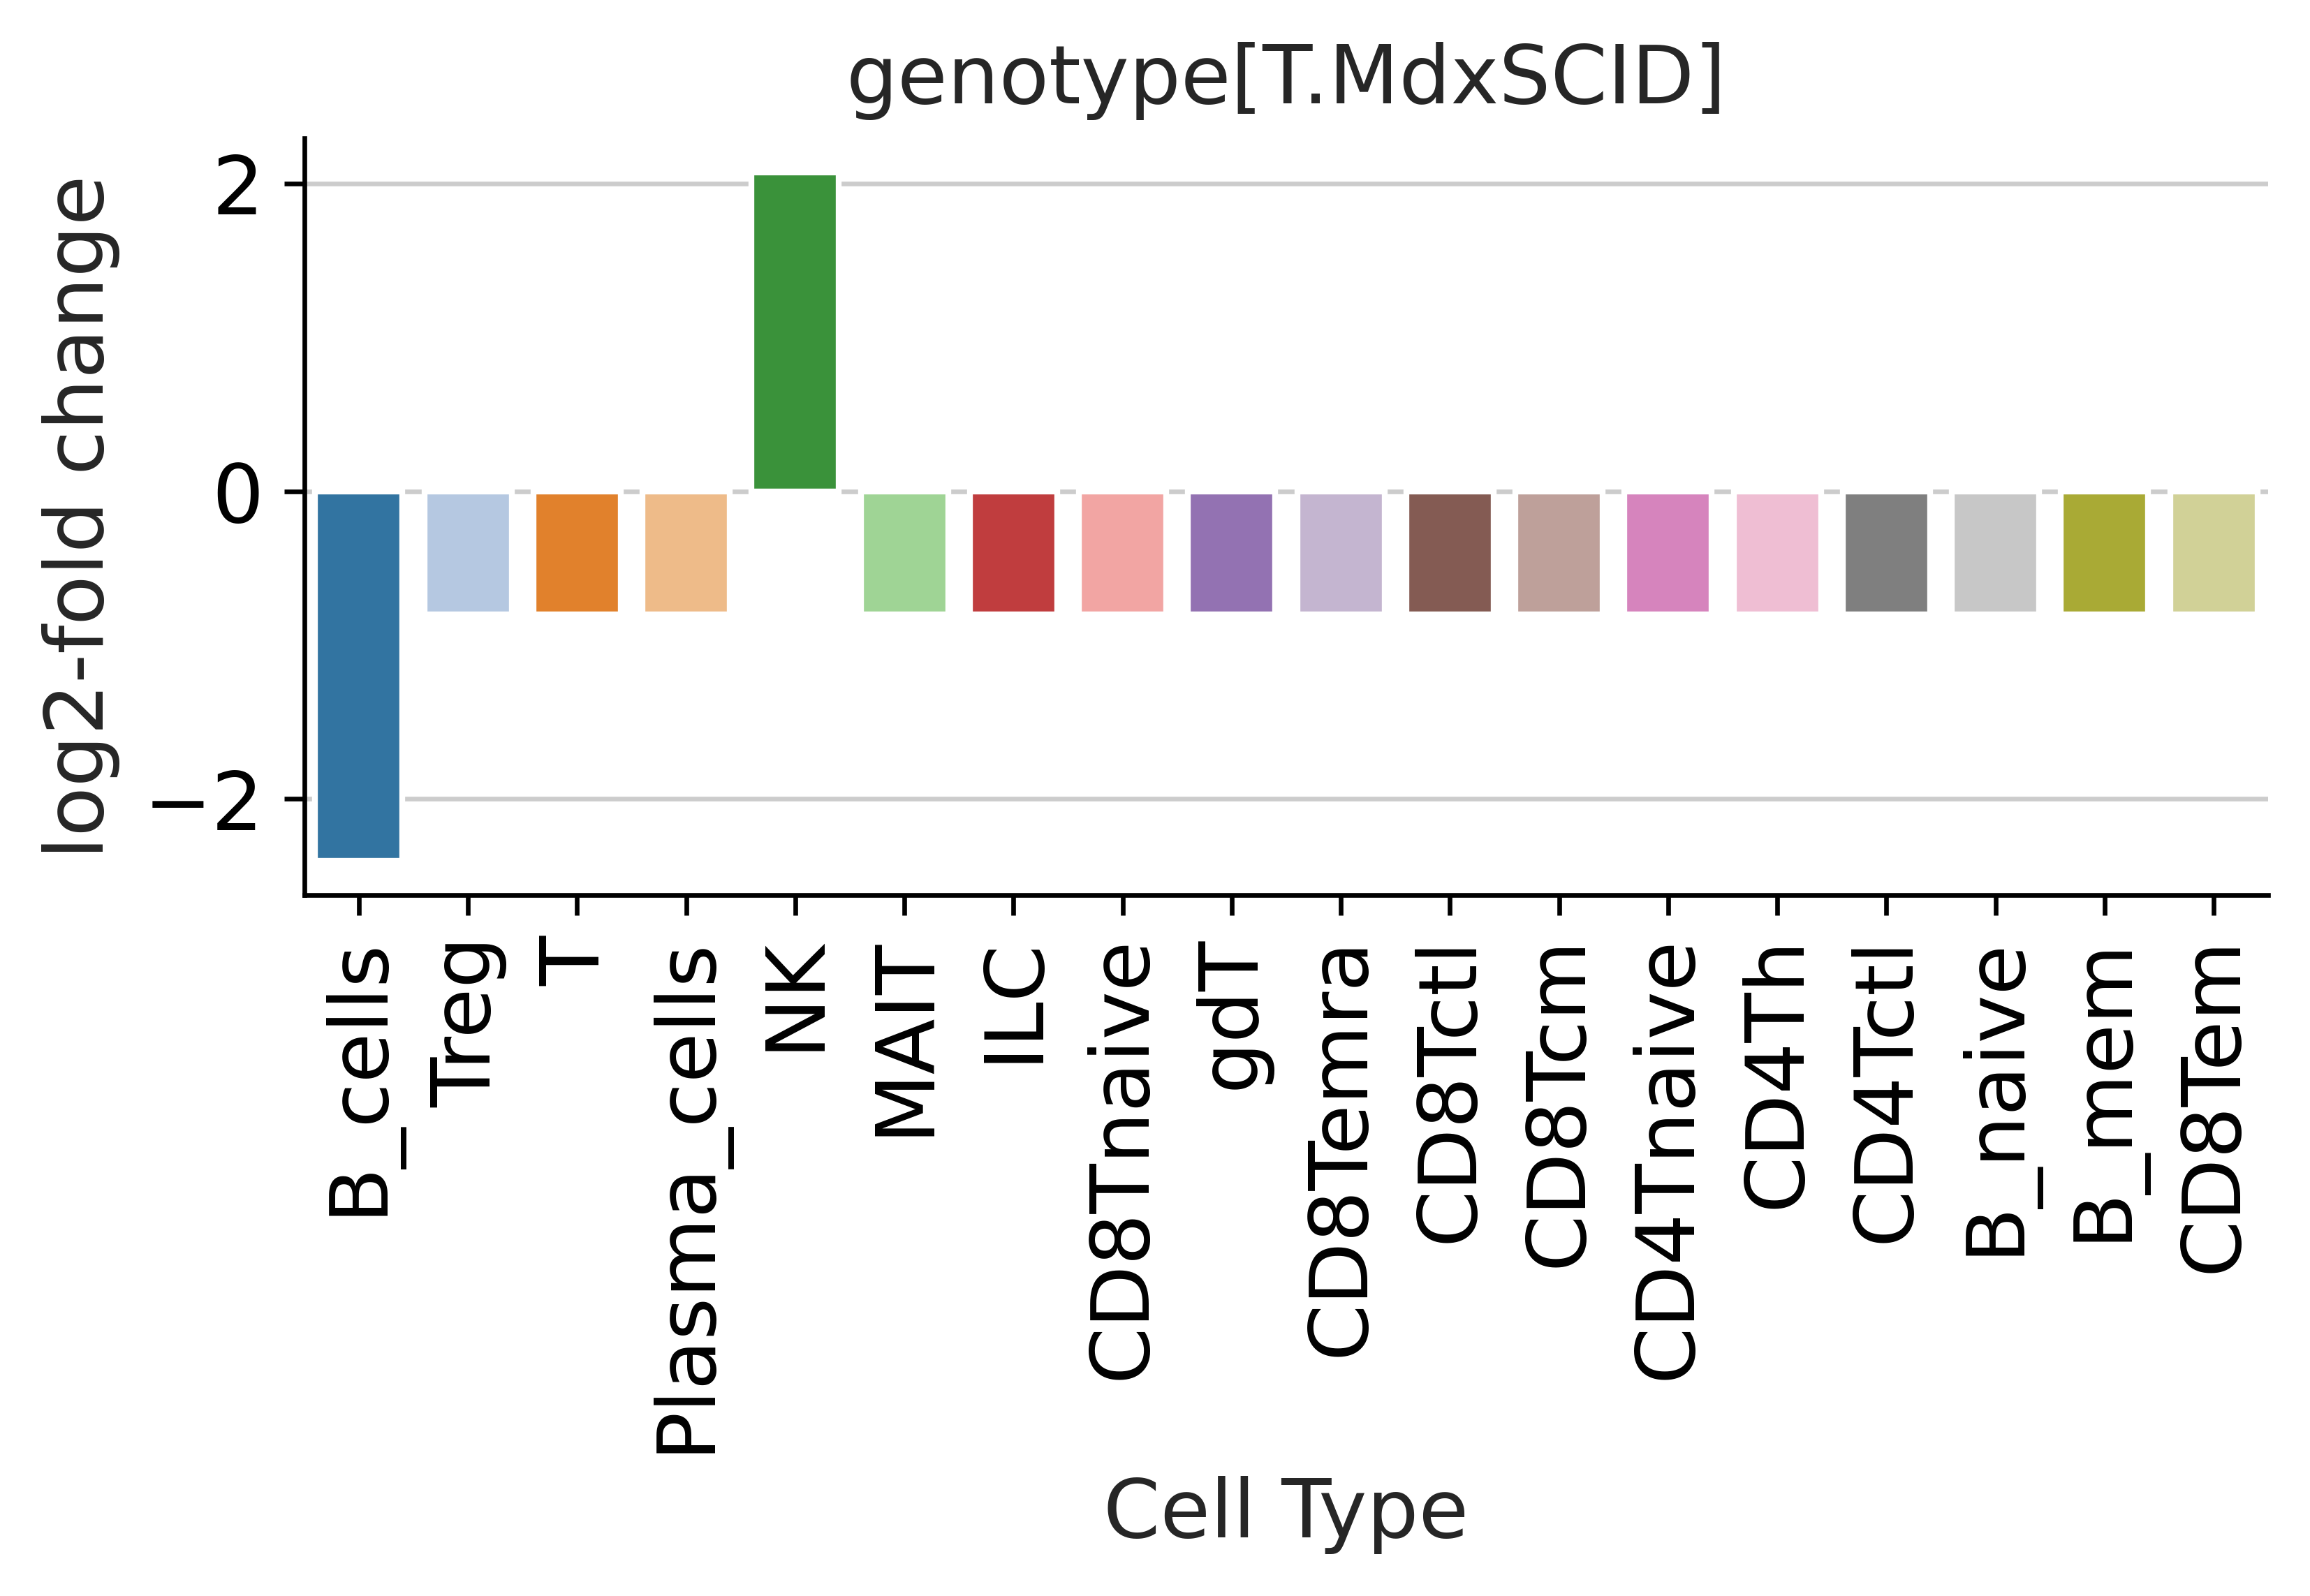

In [15]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key='coda')

In [16]:
mdx_data = adata[adata.obs['genotype'].isin(['WT', 'Mdx'])].copy()
mdxscid_data = adata[adata.obs['genotype'].isin(['WT', 'MdxSCID'])].copy()

# ScCODA - Mdx

In [17]:
mdx_model = pt.tl.Sccoda()
sccoda_mdx_data = mdx_model.load(mdx_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdx_data

MuData object with n_obs × n_vars = 52063 × 16078
  2 modalities
    rna:	52049 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	14 x 18
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

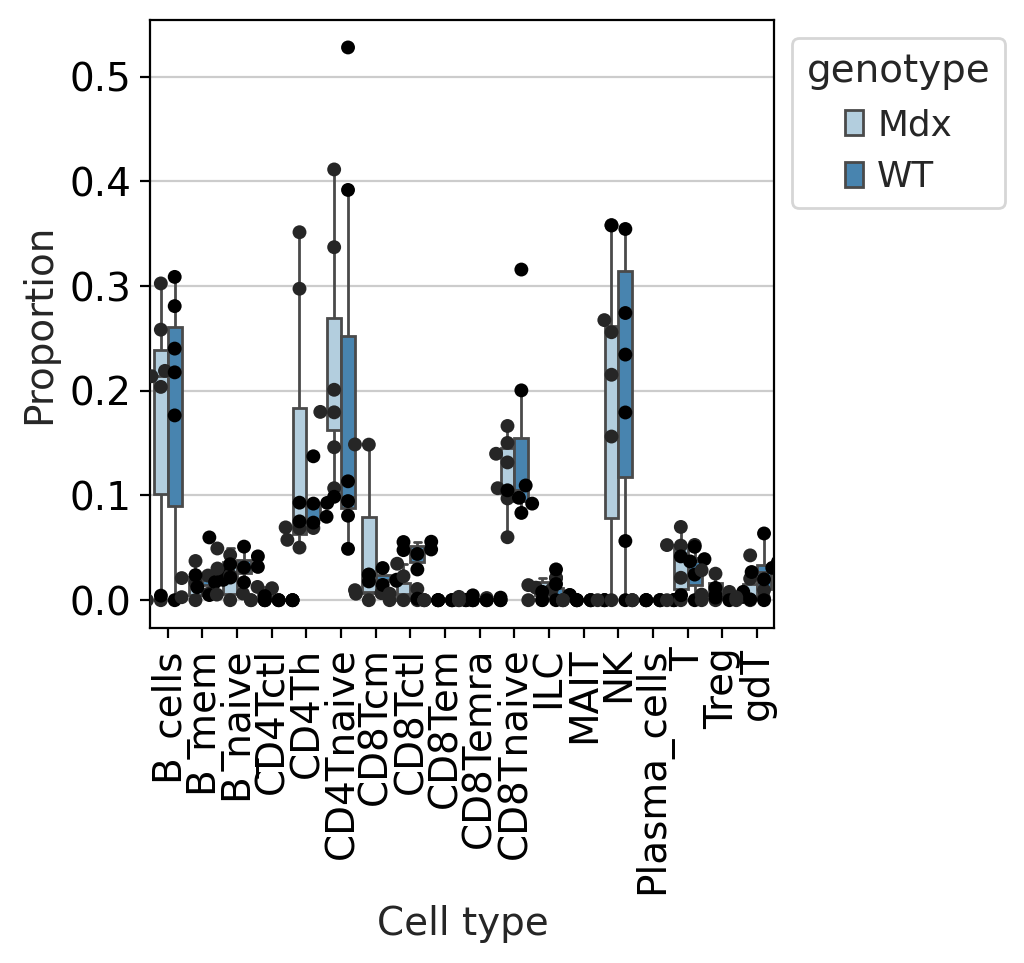

In [18]:
pt.pl.coda.boxplots(sccoda_mdx_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

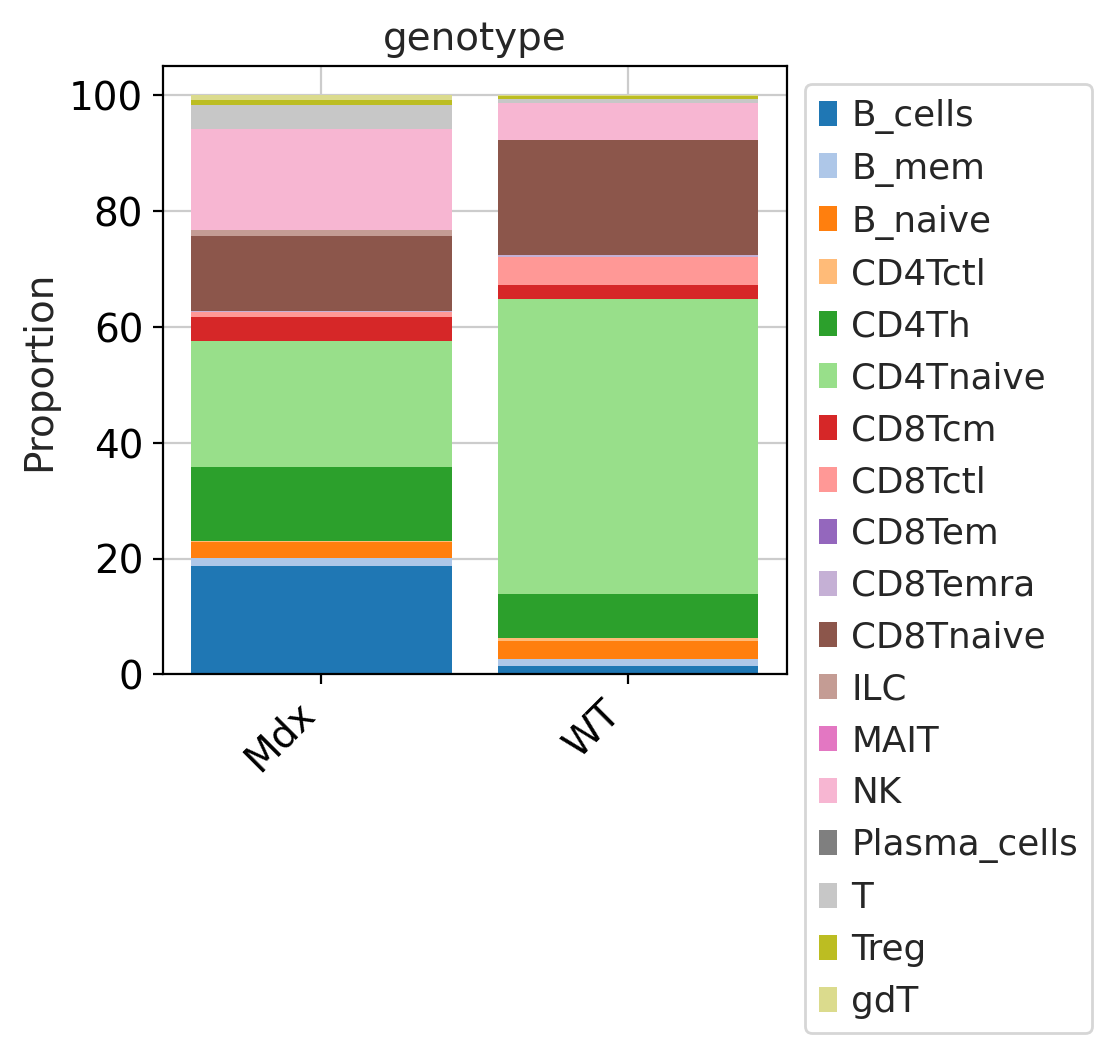

In [19]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

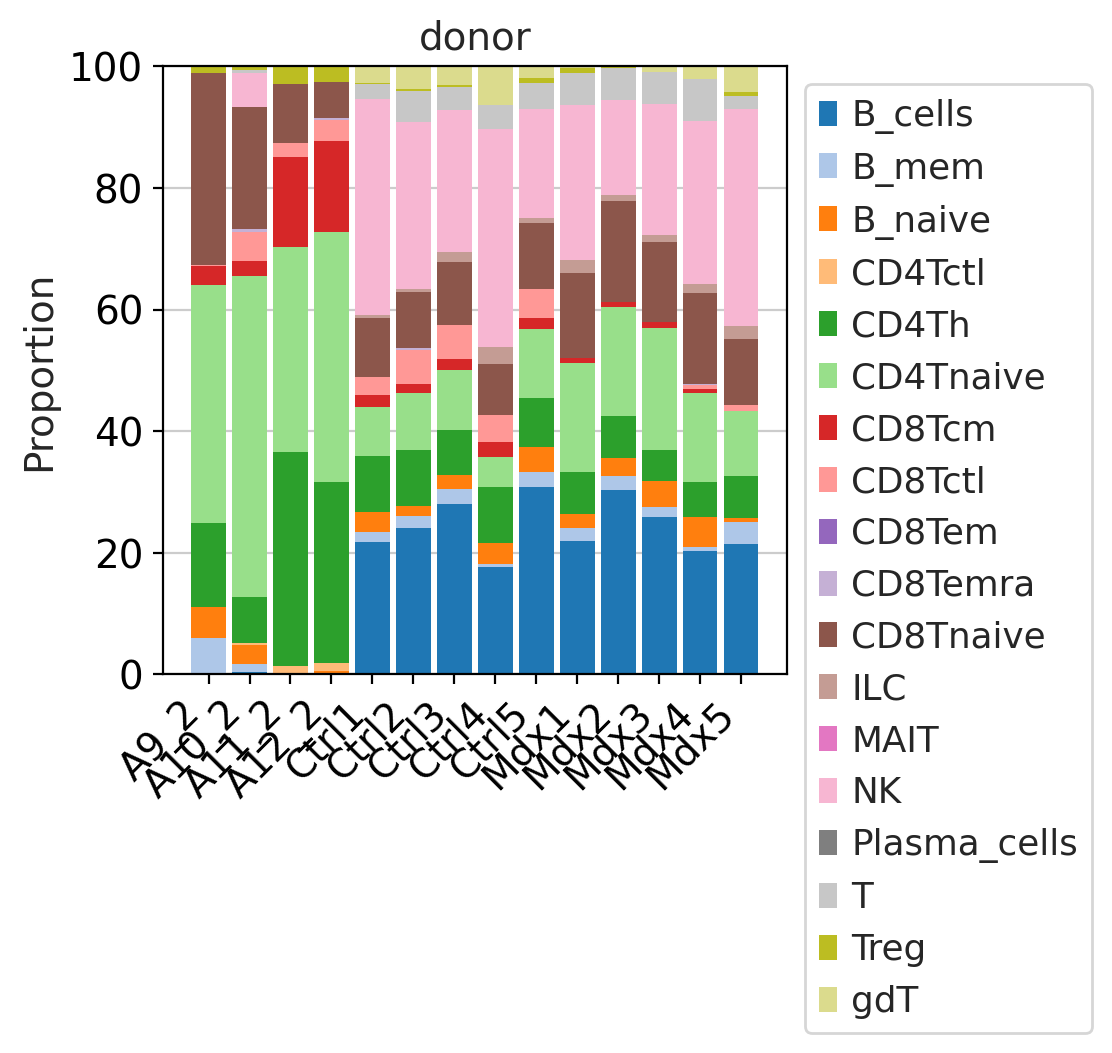

In [20]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='donor')

In [21]:
sccoda_mdx_data = mdx_model.prepare(sccoda_mdx_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdx_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to CD8Tnaive

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:20<00:00, 540.32it/s, 63 steps of size 8.57e-02. acc. prob=0.72]


In [22]:
mdx_model.set_fdr(sccoda_mdx_data, 0.05)

In [23]:
sccoda_mdx_data

MuData object with n_obs × n_vars = 52063 × 16078
  2 modalities
    rna:	52049 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	14 x 18
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [24]:
sccoda_mdx_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_cells,0.0,-0.380,0.322,0.124,0.4923,355.337776,0.0
B_mem,0.0,-0.304,0.457,0.142,0.5078,126.731265,0.0
B_naive,0.0,-0.266,0.516,0.149,0.5089,157.286474,0.0
CD4Tctl,0.0,-0.416,0.357,0.136,0.5032,58.854531,0.0
CD4Th,0.0,-0.380,0.276,0.117,0.4990,440.569769,0.0
CD4Tnaive,0.0,-0.497,0.168,0.144,0.5352,730.017728,0.0
CD8Tcm,0.0,-0.338,0.425,0.137,0.5025,147.388037,0.0
CD8Tctl,0.0,-0.206,0.726,0.202,0.5559,117.691738,0.0
CD8Tem,0.0,-0.411,0.379,0.142,0.5089,50.757979,0.0


In [25]:
mdx_model.credible_effects(sccoda_mdx_data, modality_key="coda")

Covariate       Cell Type   
genotype[T.WT]  B_cells         False
                B_mem           False
                B_naive         False
                CD4Tctl         False
                CD4Th           False
                CD4Tnaive       False
                CD8Tcm          False
                CD8Tctl         False
                CD8Tem          False
                CD8Temra        False
                CD8Tnaive       False
                ILC             False
                MAIT            False
                NK              False
                Plasma_cells    False
                T               False
                Treg            False
                gdT             False
Name: Final Parameter, dtype: bool

<Axes: xlabel='Cell type', ylabel='Proportion'>

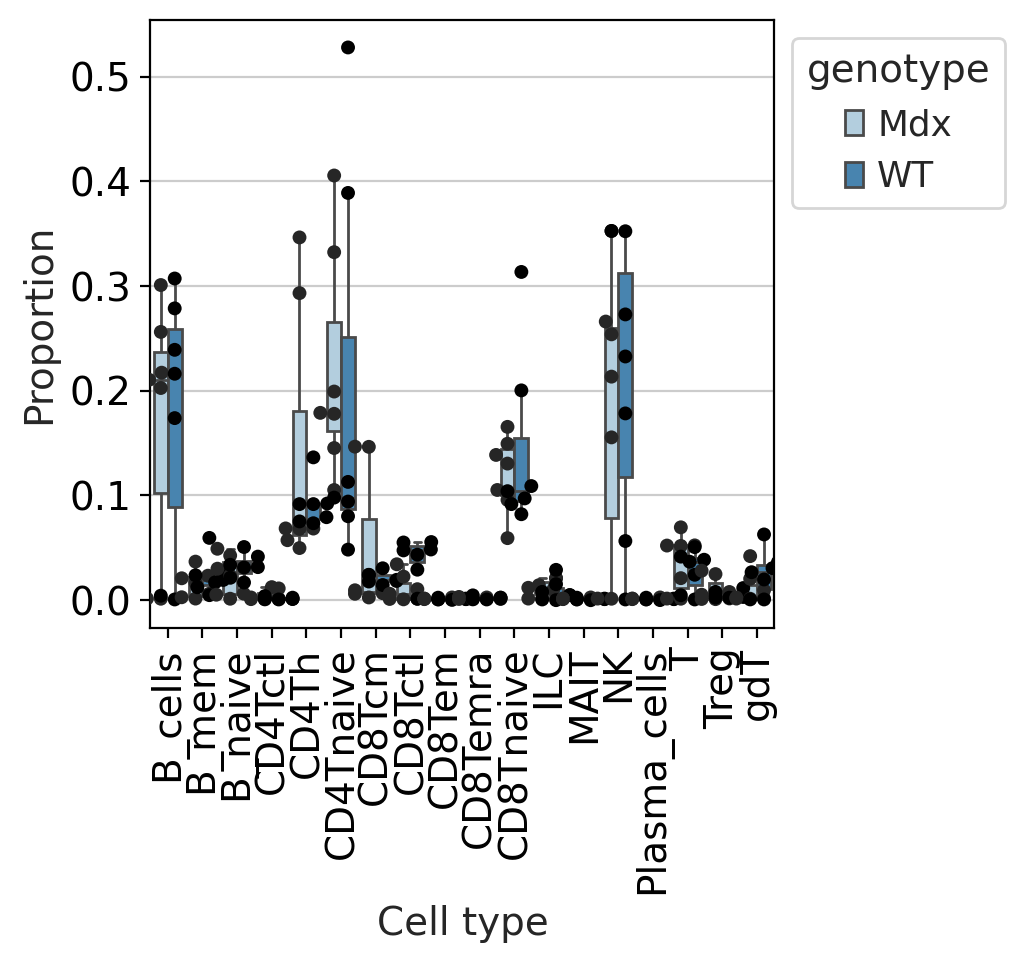

In [26]:
pt.pl.coda.boxplots(sccoda_mdx_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

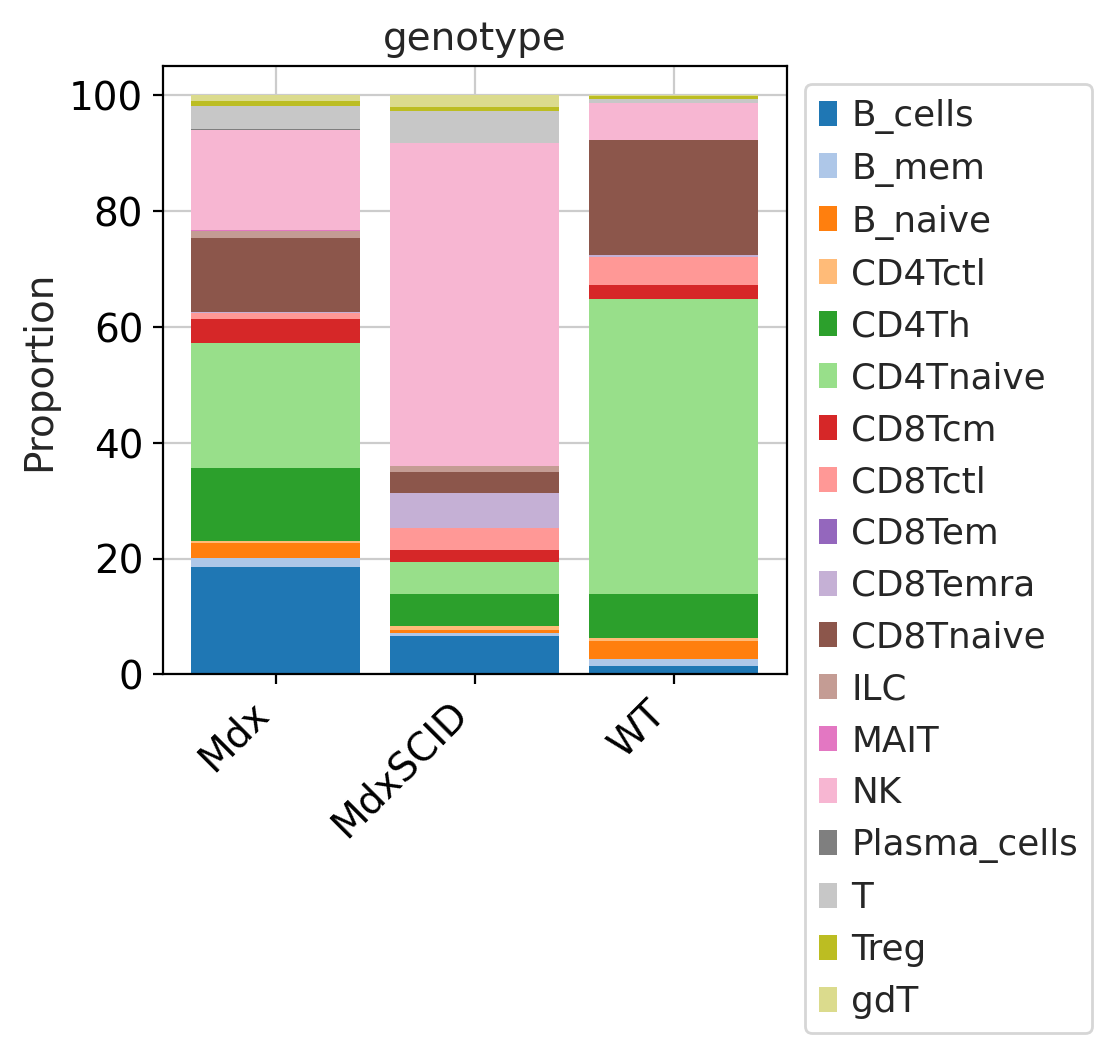

In [27]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

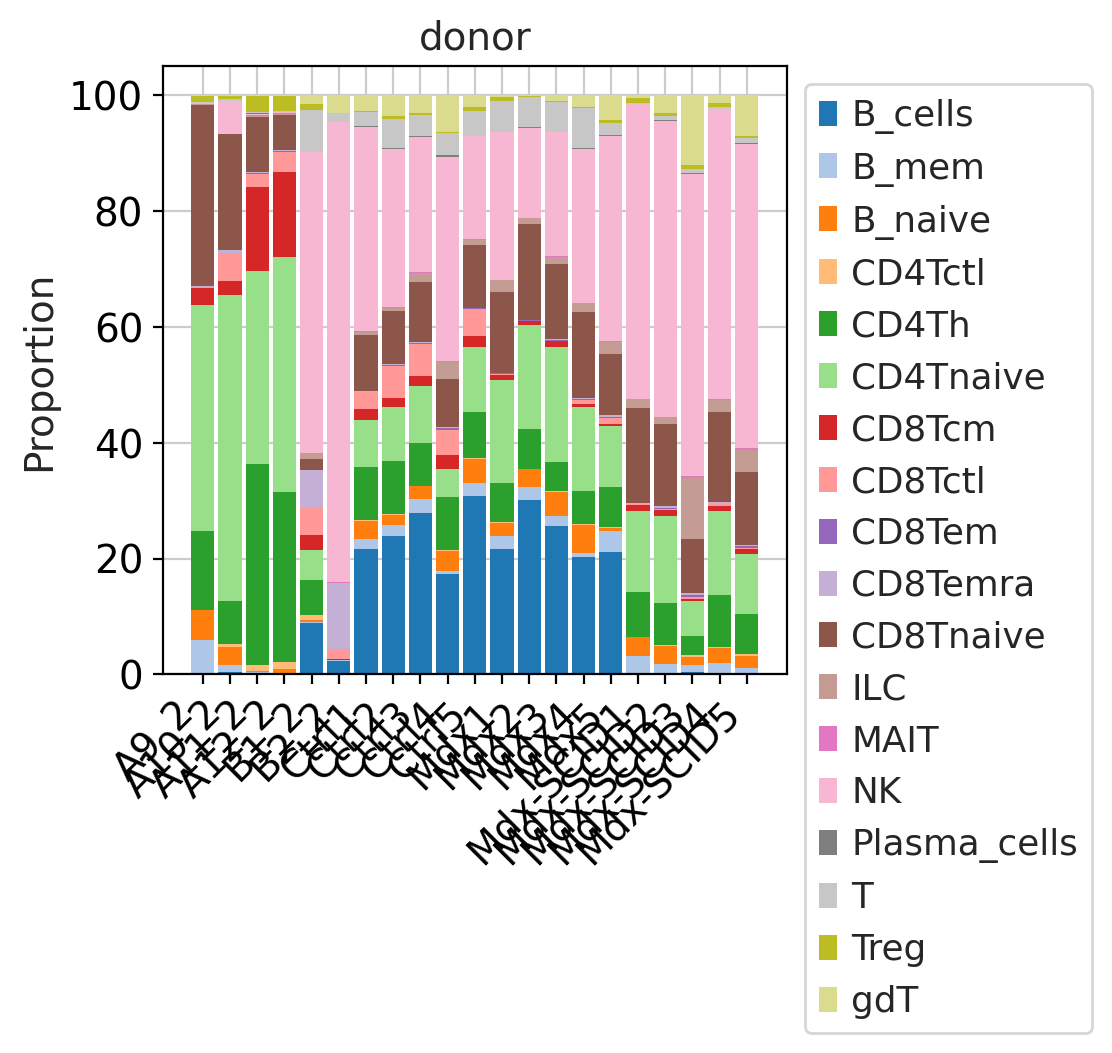

In [28]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='donor')

# ScCODA - MdxSCID

In [29]:
mdxscid_model = pt.tl.Sccoda()
sccoda_mdxscid_data = mdxscid_model.load(mdxscid_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 62827 × 16078
  2 modalities
    rna:	62813 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	14 x 18
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

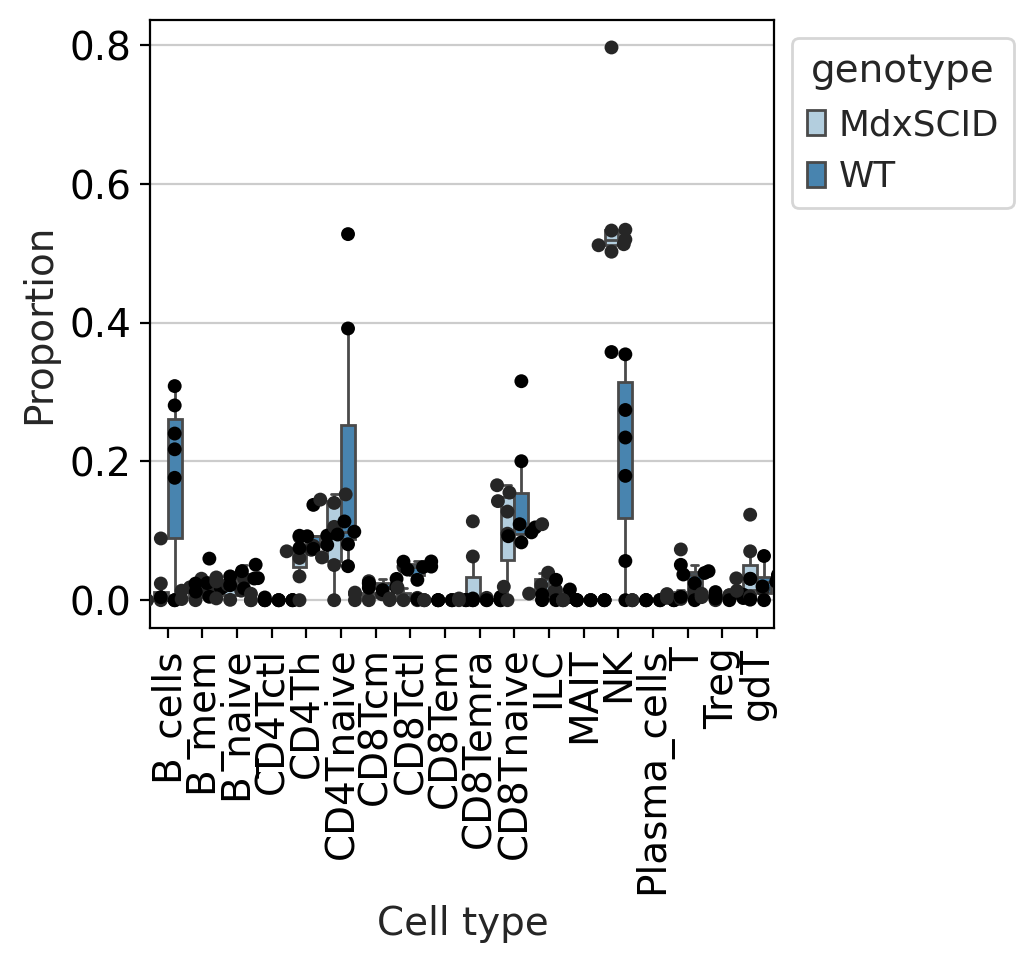

In [30]:
pt.pl.coda.boxplots(sccoda_mdxscid_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

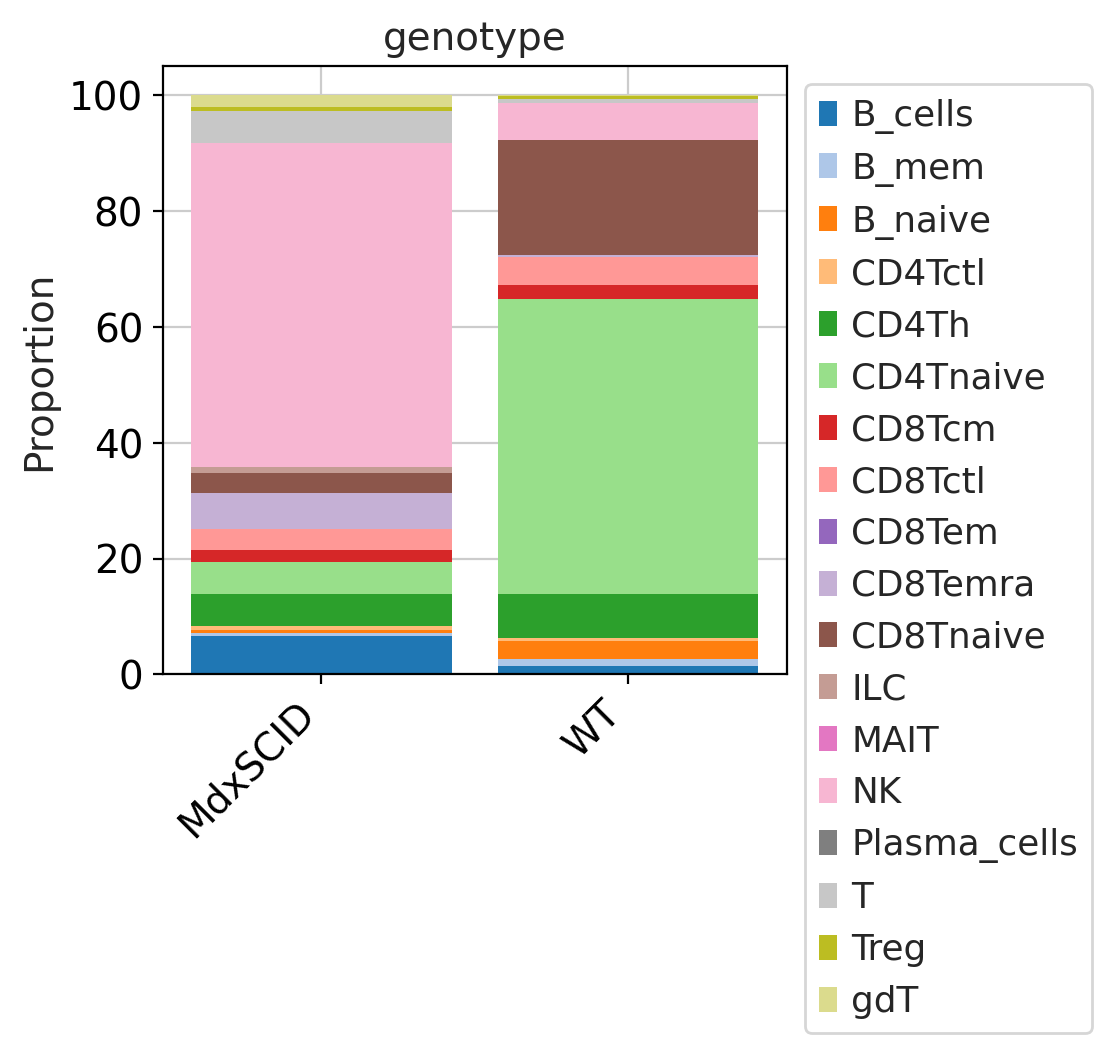

In [31]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

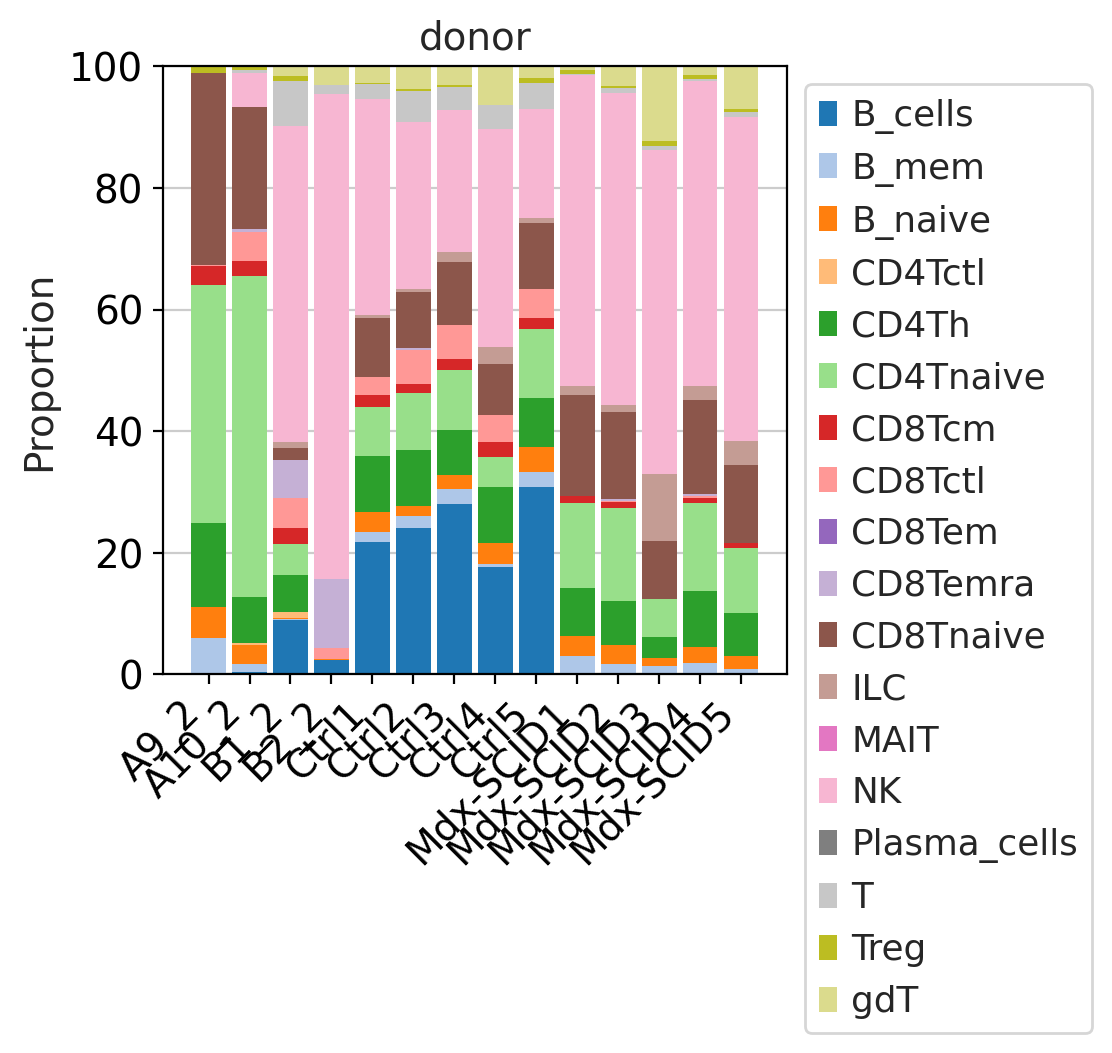

In [32]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='donor')

In [33]:
sccoda_mdxscid_data = mdx_model.prepare(sccoda_mdxscid_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdxscid_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to B_naive

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [01:12<00:00, 150.81it/s, 255 steps of size 1.76e-02. acc. prob=0.91]


In [34]:
mdx_model.set_fdr(sccoda_mdxscid_data, 0.05)

In [35]:
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 62827 × 16078
  2 modalities
    rna:	62813 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	14 x 18
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [36]:
sccoda_mdxscid_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_cells,0.000000,-0.004,1.755,0.549,0.8557,161.674420,0.887079
B_mem,0.000000,-0.525,1.036,0.269,0.4016,174.615176,0.887079
B_naive,0.000000,0.000,0.000,0.000,0.0000,231.964550,0.887079
CD4Tctl,0.000000,-0.992,0.714,0.292,0.4078,83.561640,0.887079
CD4Th,0.000000,-0.321,0.990,0.263,0.4100,451.052869,0.887079
CD4Tnaive,0.000000,-0.282,0.979,0.284,0.4512,612.521816,0.887079
CD8Tcm,0.000000,-0.510,1.095,0.302,0.4304,172.015495,0.887079
CD8Tctl,0.000000,-0.296,1.315,0.376,0.4891,171.157564,0.887079
CD8Tem,0.000000,-0.900,0.841,0.288,0.4016,71.064262,0.887079


In [37]:
mdx_model.credible_effects(sccoda_mdxscid_data, modality_key="coda")

Covariate       Cell Type   
genotype[T.WT]  B_cells         False
                B_mem           False
                B_naive         False
                CD4Tctl         False
                CD4Th           False
                CD4Tnaive       False
                CD8Tcm          False
                CD8Tctl         False
                CD8Tem          False
                CD8Temra        False
                CD8Tnaive       False
                ILC             False
                MAIT            False
                NK               True
                Plasma_cells    False
                T               False
                Treg            False
                gdT             False
Name: Final Parameter, dtype: bool

<Axes: xlabel='Cell type', ylabel='Proportion'>

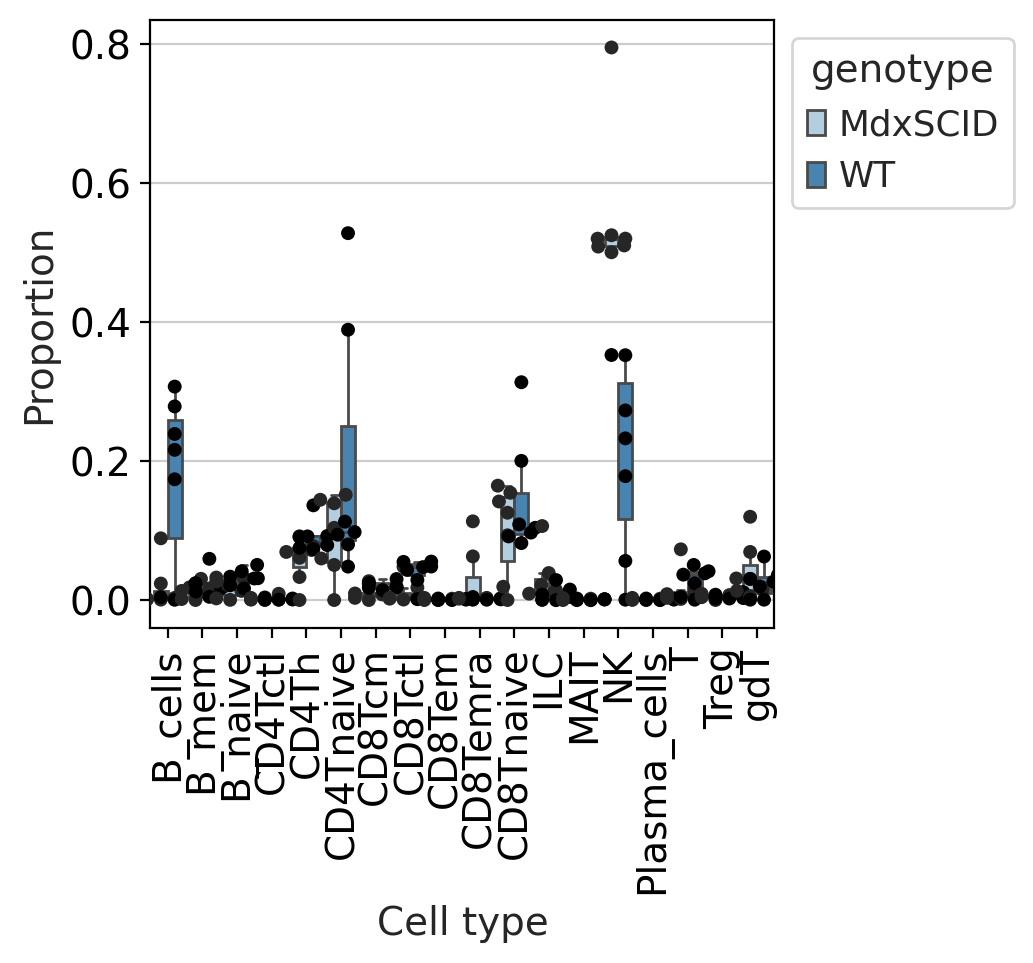

In [38]:
pt.pl.coda.boxplots(sccoda_mdxscid_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

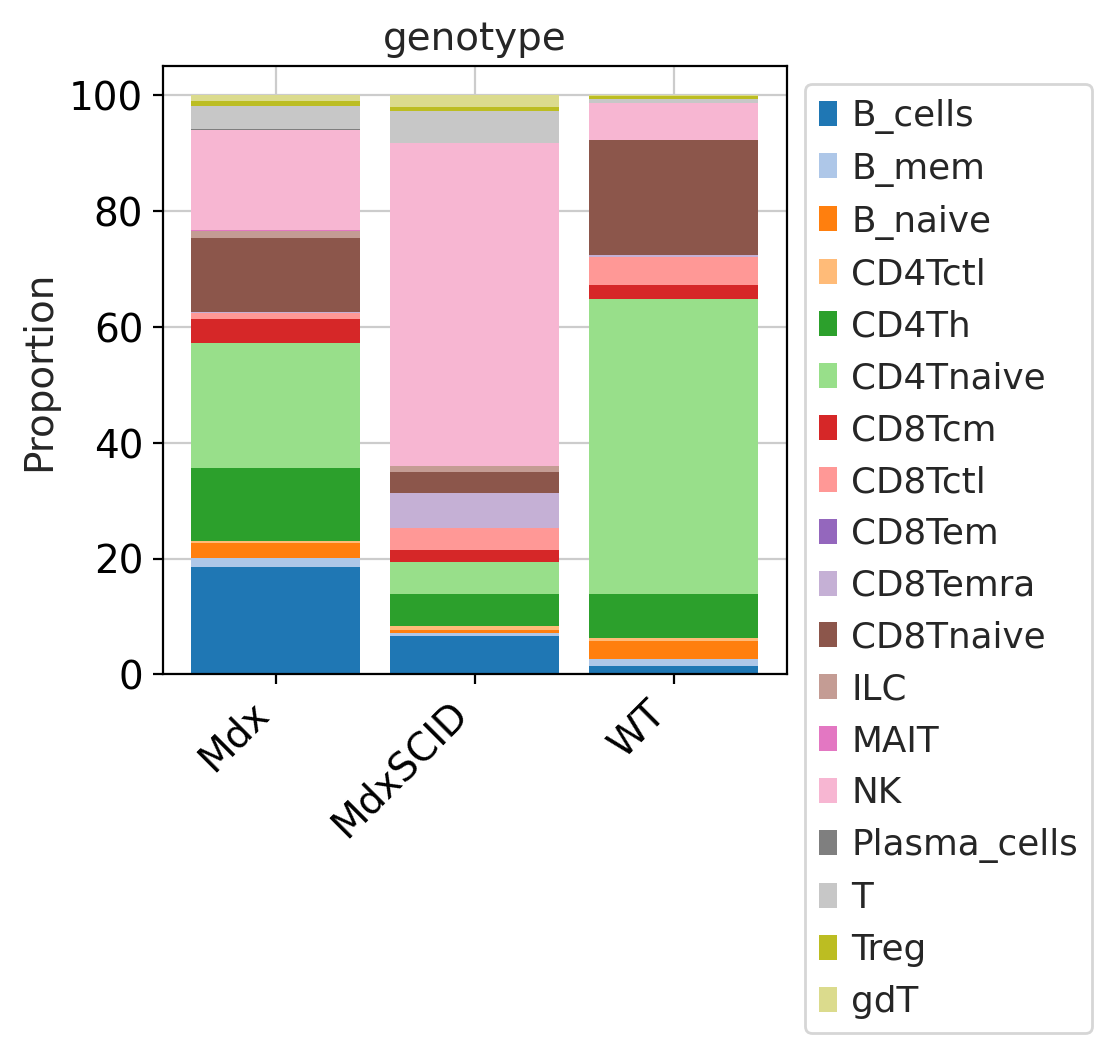

In [39]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

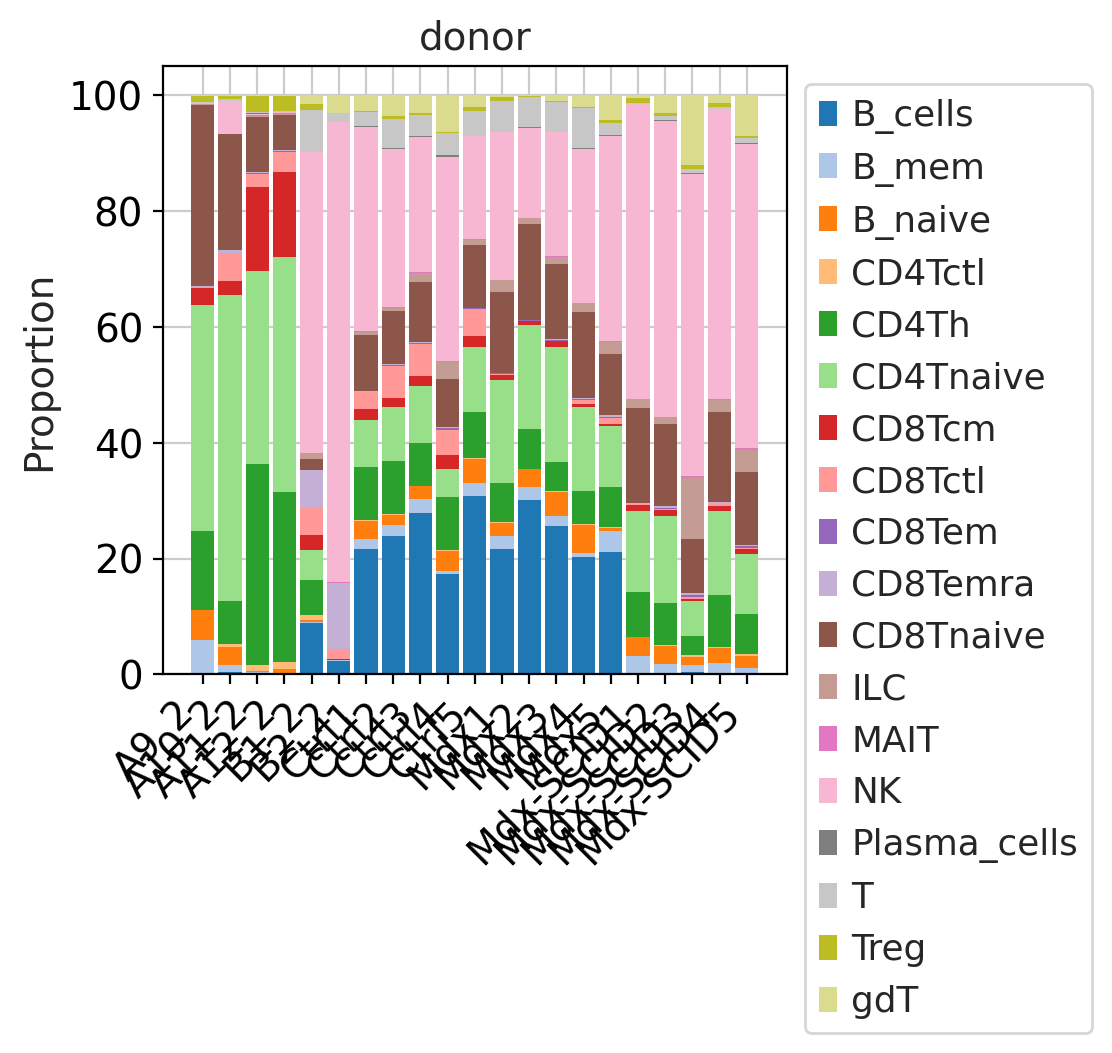

In [40]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='donor')